# test data feeder separately

In [1]:
import numpy

N_FRAMES = 40 #8*16000/20 #40
FRAME_SIZE = 20
EMB_SIZE = 256

BATCH_SIZE = 20
SEQ_LEN = N_FRAMES * FRAME_SIZE
OVERLAP = FRAME_SIZE
Q_LEVELS = 256
Q_ZERO = numpy.int32(Q_LEVELS//2)
Q_TYPE = 'linear'


#---in two_tier.py---
from datasets.dataset_con import speech_train_feed_epoch as train_feeder
from datasets.dataset_con import speech_valid_feed_epoch as valid_feeder
from datasets.dataset_con import speech_test_feed_epoch  as test_feeder

# from datasets.dataset_con_init import speech_train_feed_epoch as train_feeder
# from datasets.dataset_con_init import speech_valid_feed_epoch as valid_feeder
# from datasets.dataset_con_init import speech_test_feed_epoch  as test_feeder

def load_data(data_feeder):
    """
    Helper function to deal with interface of different datasets.
    `data_feeder` should be `train_feeder`, `valid_feeder`, or `test_feeder`.
    """
    return data_feeder(FRAME_SIZE,
                       BATCH_SIZE,
                       SEQ_LEN,
                       OVERLAP,
                       Q_LEVELS,
                       Q_ZERO,
                       Q_TYPE)

In [14]:
tr_feeder = load_data(test_feeder)
mini_batch = tr_feeder.next()
seqs, reset, mask, seqs_lab = mini_batch
print(seqs.shape)
print(seqs_lab.shape)


REMINDER: lab is NOT not quantized

(20, 128020)
(20, 6400, 601)


In [9]:
print(seqs_lab[:,:,597])

[[  18.     18.     18.     18.     18.     18.     18.     18.     18.
    18.     18.     18.     18.     18.     18.     18.     18.     18.
    18.     18.     18.     18.     18.     18.     18.     18.     18.
    18.     18.     18.     18.     18.     18.     18.     18.     18.
    18.     18.     18.     18.  ]
 [  29.     29.     29.     29.     29.     29.     29.     29.     29.
    29.     29.     29.     29.     29.     29.     29.     29.     29.
    29.     29.     29.     29.     29.     29.     29.     23.75   18.5
    13.25    8.      8.      8.      8.      8.      8.      8.      8.
     8.      8.      8.      8.  ]
 [ 110.    110.    110.    110.    110.    110.    110.    110.    110.
   110.    110.    110.    110.    110.    110.    110.    110.    110.
   110.    110.    110.    110.    110.    110.    110.    110.    110.
   110.    110.    110.    110.    110.    110.    110.    110.    110.
   110.    110.    110.    110.  ]
 [  24.     24.     24.     24

lab normalized to 0,1

In [17]:
tr_feeder = load_data(train_feeder)
mini_batch = tr_feeder.next()
seqs, reset, mask, seqs_lab = mini_batch

In [18]:
print(seqs.shape)
print(seqs_lab.shape)

(20, 820)
(20, 40, 601)


In [20]:
print(seqs_lab[:,:,597])

[[ 31  31  31  31  31  31  31  31  31  31  31  31  31  31  31  31  31  25
   20  15  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10
   10  10  10  10]
 [167 167 167 167 167 167 167 167 167 167 167 167 167 167 167 167 167 167
  167 167 167 167 167 167 167 167 167 167 167 167 167 167 167 167 167 167
  167 167 167 167]
 [192 192 192 192 192 192 192 192 192 192 192 192 192 192 192 192 192 192
  192 192 192 192 192 192 192 192 192 192 192 192 192 192 192 192 192 192
  192 192 192 192]
 [156 156 156 156 156 156 156 156 156 156 156 156 156 156 156 156 156 156
  156 156 156 156 156 156 156 156 156 156 156 156 156 156 156 156 156 156
  156 156 156 156]
 [ 85  85  85  85  85  85  85  85  85  85  85  85  85  85  85  85  85  85
   85  85  85  85  85  85  85  85  85  85  85  85  85  85  85  85  85  85
   85  85  85  85]
 [  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
    2   2   2   4   5   6   7   7   7   7   7   7   7   7   7   7   7   7
    7   7   7   7

In [8]:
from datasets.dataset_con import __normalize

In [10]:
tmp = numpy.array([[1,2],[3,4]])
print(tmp)
print(__normalize(tmp))

[[1 2]
 [3 4]]
[[0 1]
 [0 1]]


In [23]:
dirFile='datasets/speech/lab_norm/speech_test_lab.npy'
train_lab = numpy.load(dirFile)
print(train_lab.shape)

(27, 1600, 601)


see if lab is set to q_zero=128: OK

In [25]:
tr_feeder = load_data(test_feeder)
mini_batch = tr_feeder.next()
seqs, reset, mask, seqs_lab = mini_batch

In [7]:
print(seqs.shape)
print(seqs_lab.shape)
print(numpy.sum(seqs_lab==128))
print(20*40*601)

(20, 820)
(20, 40, 601)
480800
480800


In [26]:
#back to normal: feeding in lab data, not q_zero
print(seqs.shape)
print(seqs_lab.shape)
print(numpy.sum(seqs_lab==128))
print(20*40*601)

(20, 820)
(20, 40, 601)
0
480800


init with real data

In [16]:
tr_feeder = load_data(test_feeder)
mini_batch = tr_feeder.next()
seqs, reset, mask, seqs_lab = mini_batch


REMINDER: __fixed_shuffle is on


REMINDER: __fixed_shuffle is on


REMINDER: lab is NOT divided to reduce its importance



In [18]:
print(seqs.shape)
print(seqs_lab.shape)

(20, 128020)
(20, 6400, 601)


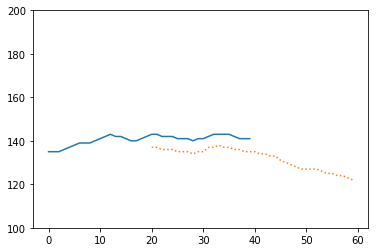

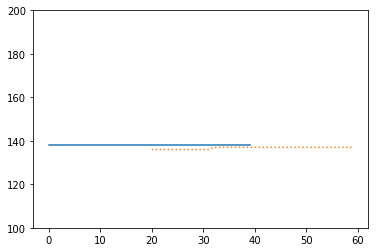

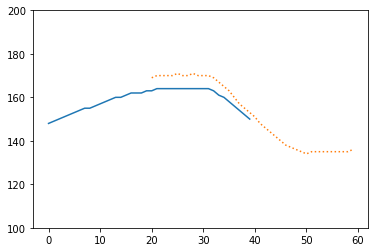

In [4]:
import matplotlib.pyplot as plt

data = seqs[0][-40:]
x = range(40)
plt.plot(x,data)
data = seqs[1][:40]
x = range(20,60)
plt.plot(x,data,':')
plt.ylim([100,200])
plt.show()


data = seqs[1][-40:]
x = range(40)
plt.plot(x,data)
data = seqs[2][:40]
x = range(20,60)
plt.plot(x,data,':')
plt.ylim([100,200])
plt.show()

data = seqs[3][-40:]
x = range(40)
plt.plot(x,data)
data = seqs[4][:40]
x = range(20,60)
plt.plot(x,data,':')
plt.ylim([100,200])
plt.show()

remove quantization on lab to improve precision: OK, code is working

In [3]:
tr_feeder = load_data(test_feeder)
mini_batch = tr_feeder.next()
seqs, reset, mask, seqs_lab = mini_batch
print(seqs.shape)
print(seqs_lab.shape)


REMINDER: lab is NOT not quantized

(20, 820)
(20, 40, 601)


In [5]:
print(seqs_lab[:,:,597])

[[ 0.65895951  0.65895951  0.65895951  0.65895951  0.65895951  0.65895951
   0.65895951  0.65895951  0.65895951  0.65895951  0.65895951  0.65895951
   0.65895951  0.65895951  0.65895951  0.65895951  0.65895951  0.65895951
   0.65895951  0.65895951  0.65895951  0.65895951  0.65895951  0.65895951
   0.65895951  0.65895951  0.65895951  0.65895951  0.65895951  0.65895951
   0.65895951  0.65895951  0.65895951  0.65895951  0.65895951  0.65895951
   0.65895951  0.65895951  0.65895951  0.65895951]
 [ 0.08092485  0.08092485  0.08092485  0.08092485  0.08092485  0.08092485
   0.08092485  0.08092485  0.08092485  0.08092485  0.08092485  0.08092485
   0.08092485  0.08092485  0.08092485  0.08092485  0.08092485  0.08092485
   0.08092485  0.08092485  0.08092485  0.08092485  0.08092485  0.08092485
   0.08092485  0.08092485  0.08092485  0.08092485  0.08092485  0.09104046
   0.10115606  0.11127167  0.12138728  0.12138728  0.12138728  0.12138728
   0.12138728  0.12138728  0.12138728  0.12138728]
 [ 0.06358

In [2]:
tr_feeder = load_data(test_feeder)
mini_batch = tr_feeder.next()
seqs, reset, mask, seqs_lab = mini_batch
print(seqs.shape)
print(seqs_lab.shape)


REMINDER: lab is quantized

(20, 820)
(20, 40, 601)


In [3]:
print(seqs_lab[:,:,597])

[[168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168
  168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168 168
  168 168 168 168]
 [ 20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20
   20  20  20  20  20  20  20  20  20  20  20  23  25  28  31  31  31  31
   31  31  31  31]
 [ 16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16
   16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16
   16  16  16  16]
 [125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125
  125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125
  125 125 125 125]
 [  1   3   5   8  10  10  10  10  10  10  10  10  10  10  10  10  10  10
   10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10
   10  10  10  10]
 [ 97  97  97  97  97  97  97  97  97  97  97  97  97  97  97  97  97  97
   97  97  97  97  97  97  97  97  97  97  97  97  97  97  97  97  97  97
   97  97  97  97

sample for 3t

In [5]:
tr_feeder = load_data(test_feeder)
mini_batch = tr_feeder.next()
seqs, reset, mask, seqs_lab = mini_batch
print(seqs.shape)
print(seqs_lab.shape)


REMINDER: lab is NOT not quantized

(20, 820)
(20, 40, 601)


In [6]:
seqs_lab_big = seqs_lab[:,::4,:]
print(seqs_lab_big.shape)

(20, 10, 601)


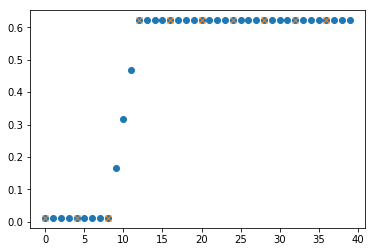

In [8]:
import matplotlib.pyplot as plt
rowIdx = 0
dimIdx = 594

data = seqs_lab[rowIdx,:,dimIdx]
x = range(len(data))
plt.plot(x,data,'o')
data = seqs_lab_big[rowIdx,:,dimIdx]
plt.plot(x[::4],data,'x')
plt.show()

plot for thesis

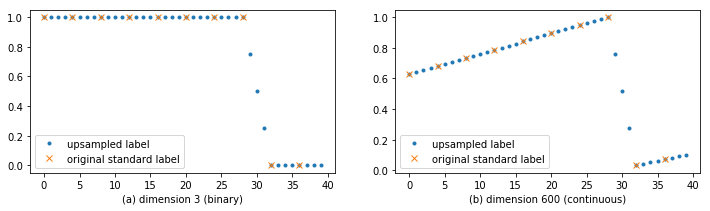

In [41]:
rowIdx = 1


plt.figure(figsize=(12,3))
dimIdx = 3
plt.subplot(121)
data = seqs_lab[rowIdx,:,dimIdx]
x = range(len(data))
plt.plot(x,data,'.',label='upsampled label')
data = seqs_lab_big[rowIdx,:,dimIdx]
plt.plot(x[::4],data,'x',label='original standard label')
plt.xlabel('(a) dimension '+str(dimIdx)+' (binary)')
plt.legend()


plt.subplot(122)
dimIdx = 600
data = seqs_lab[rowIdx,:,dimIdx]
x = range(len(data))
plt.plot(x,data,'.',label='upsampled label')
data = seqs_lab_big[rowIdx,:,dimIdx]
plt.plot(x[::4],data,'x',label='original standard label')
plt.xlabel('(b) dimension '+str(dimIdx)+' (continuous)')
plt.legend()

plt.show()

# test main functions

In [7]:
import numpy
from models.two_tier.two_tier_con import generate_and_save_samples

ImportError: No module named two_tier.two_tier_con

In [21]:
N_SEQS = 10

testData_feeder = load_data(test_feeder)
mini_batch = testData_feeder.next()
_, _, _, seqs_lab = mini_batch
samples_lab = seqs_lab[:N_SEQS]

In [11]:
t = FRAME_SIZE
tmp = samples_lab[:,(t-FRAME_SIZE)//FRAME_SIZE:(t-FRAME_SIZE)//FRAME_SIZE+1]
print(tmp.shape)

(10, 1, 601)


In [14]:
t = FRAME_SIZE
tmp = samples_lab[:,(t-FRAME_SIZE)//FRAME_SIZE,:]
print(tmp.shape)

tmp2 = tmp.reshape(tmp.shape[0],1,tmp.shape[1])
print(tmp2.shape)

(10, 601)
(10, 1, 601)


In [15]:
print(tmp[0,:])
print(tmp2[0,0,:])

[  0   0   0   0   0   0   0   0   0 255   0   0   0   0   0   0   0 255
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 255   0   0   0   0   0   0   0 255   0   0 255
   0   0   0   0 255   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 255   0   0   0   

In [25]:
N_SEQS = 10

testData_feeder = load_data(test_feeder)
mini_batch = testData_feeder.next()
_, _, _, seqs_lab = mini_batch
samples_lab = seqs_lab[:N_SEQS]

In [26]:
print(samples_lab.shape)

(10, 40, 601)


# check generated samples

In [ ]:
import scipy.io.wavfile

dirFile = '/home/douqingyun/mphilproj/data/speech/speechWavData/herald_001.used.wav'
speech_wav = scipy.io.wavfile.read(dirFile)

print('sampling rate',speech_wav[0])

data = speech_wav[1]
data = data.astype('float16')

print(data.shape)
plt.plot(data)
plt.show()

# check learning curves

In [1]:
import matplotlib.pyplot as plt
import numpy
np = numpy

def checkLearningCurves(param_vals_dict):
    cnt = 0
    styleList = ['',':','x']
    for key,param_vals in param_vals_dict.iteritems():
        xEpoch = np.array(param_vals['iter'])/6400.0
        style = styleList[cnt%3]
        cnt += 1
        plt.plot(xEpoch,param_vals['train NLL (bits)'],style,label='train '+key)
        plt.plot(xEpoch,param_vals['valid NLL (bits)'],style,label='valid '+key)
        plt.plot(xEpoch,param_vals['test NLL (bits)'],style,label='test '+key)
        plt.legend()
    plt.ylabel('NLL(bits)')
    plt.xlabel('epoch')
    plt.show()

In [2]:
#bkup - check values
def checkTrainLogValues(param_vals):
    for name, val in param_vals.iteritems():
        print(name,type(val),len(val))

    print(param_vals['train NLL (bits)'])
    print(param_vals['valid NLL (bits)'])
    print(param_vals['test NLL (bits)'])

    print(param_vals['iter'])
    print(param_vals['epoch'])

In [3]:
#bkup - compare
def compareLearningCurves(param_vals,param_vals_con):
    xEpoch = np.array(param_vals['iter'])/6400.0
    y = param_vals

    plt.plot(xEpoch,y['train NLL (bits)'],label='train uncon')
    #plt.plot(xEpoch,y['valid NLL (bits)'],label='valid uncon')
    #plt.plot(xEpoch,y['test NLL (bits)'],label='test uncon')

    xEpoch = np.array(param_vals_con['iter'])/6400.0 + 8
    y = param_vals_con

    plt.plot(xEpoch,y['train NLL (bits)'],':',label='train con')
    #plt.plot(xEpoch,y['valid NLL (bits)'],':',label='valid con')
    #plt.plot(xEpoch,y['test NLL (bits)'],':',label='test con')

    plt.ylabel('NLL(bits)')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

classic: uncon, zerolab, con (divLab, which is broken)

In [4]:
import cPickle as pickle

#uncon model
path = ('results_2t/models-two_tier-two_tier.py-expUNCON-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl'
       )
with open(path, 'rb') as f:
    param_vals = pickle.load(f)

('wall clock time', <type 'list'>, 36)
('train time', <type 'list'>, 36)
('iter', <type 'list'>, 36)
('epoch', <type 'list'>, 36)
('lowest valid cost', <type 'list'>, 36)
('test time', <type 'list'>, 36)
('correponding test cost', <type 'list'>, 36)
('test NLL (bits)', <type 'list'>, 36)
('train NLL (bits)', <type 'list'>, 36)
('valid NLL (bits)', <type 'list'>, 36)
('valid time', <type 'list'>, 36)
[1.5988337, 1.47878, 1.4466672, 1.2875996, 1.2649313, 1.2508399, 1.2390516, 1.2125081, 1.2036932, 1.1998665, 1.1852078, 1.1762711, 1.1678138, 1.1841346, 1.1603957, 1.1526628, 1.1880485, 1.1355778, 1.1320573, 1.128595, 1.1269321, 1.1191937, 1.1130762, 1.1259904, 1.1075568, 1.1036144, 1.0990376, 1.0924778, 1.1030453, 1.0848519, 1.0804291, 1.0813245, 1.0744065, 1.0796729, 1.0647006, 1.0583576]
[1.4103212, 1.3204213, 1.3260252, 1.287706, 1.2699434, 1.2580588, 1.2451617, 1.239413, 1.2355617, 1.2501476, 1.2326092, 1.2339538, 1.2463009, 1.2356787, 1.2390581, 1.2411389, 1.247514, 1.2507291, 1.25643

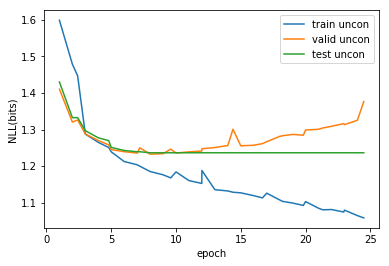

In [12]:
checkTrainLogValues(param_vals)
param_vals_dict = {}
param_vals_dict['uncon'] = param_vals
checkLearningCurves(param_vals_dict)

In [13]:
#con model
path = ('results_2t/models-two_tier-two_tier_con.py-expCON_UNCONINIT-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl'
       )
with open(path, 'rb') as f:
    param_vals_con = pickle.load(f)

('wall clock time', <type 'list'>, 30)
('train time', <type 'list'>, 30)
('iter', <type 'list'>, 30)
('epoch', <type 'list'>, 30)
('lowest valid cost', <type 'list'>, 30)
('test time', <type 'list'>, 30)
('correponding test cost', <type 'list'>, 30)
('test NLL (bits)', <type 'list'>, 30)
('train NLL (bits)', <type 'list'>, 30)
('valid NLL (bits)', <type 'list'>, 30)
('valid time', <type 'list'>, 30)
[1.5548153, 1.4998348, 1.4890145, 1.4113737, 1.3961039, 1.3857533, 1.3740892, 1.3544867, 1.3444378, 1.3508781, 1.3260616, 1.3190088, 1.3150024, 1.3021777, 1.297534, 1.2945557, 1.291375, 1.2848432, 1.2797495, 1.2859405, 1.2760743, 1.282869, 1.2640054, 1.2589791, 1.2661871, 1.2591463, 1.2724785, 1.2533624, 1.2495661, 1.2516867]
[1.5214964, 1.4779112, 1.4628015, 1.408392, 1.3933754, 1.3911146, 1.3692117, 1.354485, 1.3387259, 1.3633696, 1.3335308, 1.3404, 1.330731, 1.3138313, 1.3110112, 1.322135, 1.3413092, 1.3178861, 1.3244632, 1.3101307, 1.329126, 1.298414, 1.2996308, 1.3485038, 1.3049736, 1.

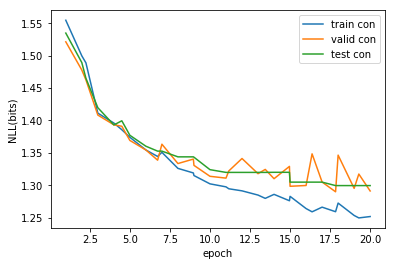

In [14]:
checkTrainLogValues(param_vals_con)
param_vals_dict = {}
param_vals_dict['con'] = param_vals_con
checkLearningCurves(param_vals_dict)

In [15]:
#zerolab model
path = ('results_2t/models-two_tier-two_tier_con.py-expZEROLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl'
       )
with open(path, 'rb') as f:
    param_vals_zerolab = pickle.load(f)

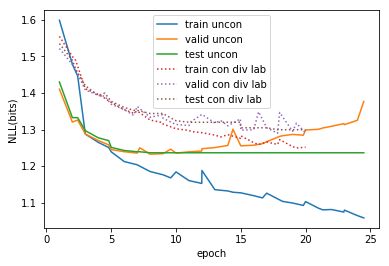

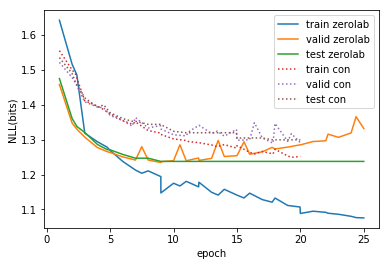

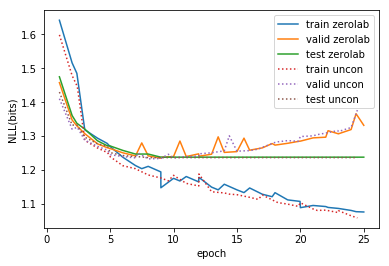

In [27]:
#compare
param_vals_dict = {}
param_vals_dict['uncon'] = param_vals
param_vals_dict['con div lab'] = param_vals_con
#param_vals_dict['zerolab'] = param_vals_zerolab
checkLearningCurves(param_vals_dict)

#compare
param_vals_dict = {}
#param_vals_dict['uncon'] = param_vals
param_vals_dict['con'] = param_vals_con
param_vals_dict['zerolab'] = param_vals_zerolab
checkLearningCurves(param_vals_dict)

#compare
param_vals_dict = {}
param_vals_dict['uncon'] = param_vals
#param_vals_dict['con'] = param_vals_con
param_vals_dict['zerolab'] = param_vals_zerolab
checkLearningCurves(param_vals_dict)

In [28]:
#fulllab model
path = ('results_2t/models-two_tier-two_tier_con.py-expCON_T4T_UNCONINIT_FULLLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals_fulllab = pickle.load(f)

('valid time', <type 'list'>, 41)
('wall clock time', <type 'list'>, 41)
('last resume index', <type 'list'>, 2)
('lowest valid cost', <type 'list'>, 41)
('epoch', <type 'list'>, 41)
('iter', <type 'list'>, 41)
('test time', <type 'list'>, 41)
('correponding test cost', <type 'list'>, 41)
('test NLL (bits)', <type 'list'>, 41)
('train NLL (bits)', <type 'list'>, 41)
('valid NLL (bits)', <type 'list'>, 41)
('train time', <type 'list'>, 41)
[1.4963965, 1.4635347, 1.3987948, 1.3664906, 1.3488334, 1.341424, 1.303838, 1.3501924, 1.2855419, 1.2764913, 1.2859004, 1.2693493, 1.2617568, 1.2411386, 1.2371721, 1.2330283, 1.2408829, 1.2224066, 1.218257, 1.2139888, 1.2212368, 1.2055943, 1.2015197, 1.1963826, 1.2096248, 1.1933018, 1.1884161, 1.1854682, 1.183111, 1.1759933, 1.1728846, 1.1635394, 1.16415, 1.1618649, 1.1590471, 1.1678976, 1.1532916, 1.1498008, 1.145824, 1.1577655, 1.1420312]
[1.4551301, 1.4207954, 1.4497283, 1.3443784, 1.3361424, 1.322727, 1.3226902, 1.30985, 1.3074995, 1.3322977, 1.29

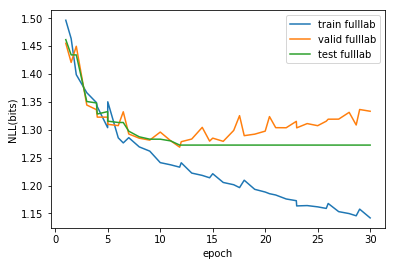

In [14]:
checkTrainLogValues(param_vals_fulllab)
param_vals_dict = {}
param_vals_dict['fulllab'] = param_vals_fulllab
checkLearningCurves(param_vals_dict)

compare UCinit and uncon: uncon has lower cost (but UCinit has more sensible samples)
<br>
compare divLab and fullLab: full lab has lower cost

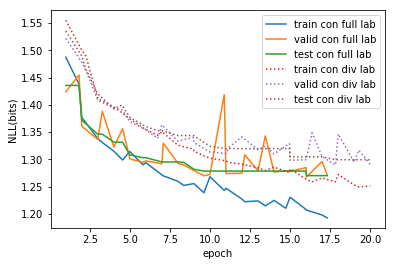

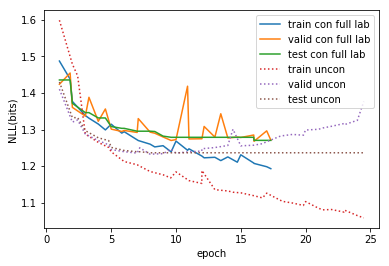

In [29]:
param_vals_dict = {}
param_vals_dict['con div lab'] = param_vals_con
param_vals_dict['con full lab'] = param_vals_fulllab
checkLearningCurves(param_vals_dict)

param_vals_dict = {}
param_vals_dict['uncon'] = param_vals
param_vals_dict['con full lab'] = param_vals_fulllab
checkLearningCurves(param_vals_dict)

compare UC and ZL: found little difference

In [32]:
#fulllab model, ZLinit

#the two ZLinit models are similar, stick to the T4T one
# path = ('results_2t/models-two_tier-two_tier_con.py-expCON_ZLINIT_FULLLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')

path = ('results_2t/models-two_tier-two_tier_con.py-expCON_T4T_ZLINIT_FULLLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals_fulllab_ZLinit = pickle.load(f)
    
#fulllab model, UCinit
path = ('results_2t/models-two_tier-two_tier_con.py-expCON_T4T_UNCONINIT_FULLLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals_fulllab_UCinit = pickle.load(f)

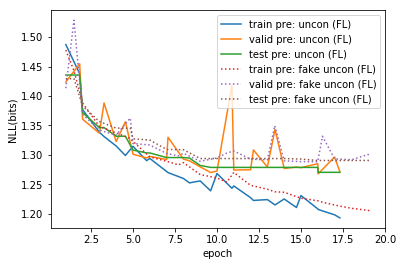

In [33]:
param_vals_dict = {}
param_vals_dict['pre: fake uncon (FL)'] = param_vals_fulllab_ZLinit
param_vals_dict['pre: uncon (FL)'] = param_vals_fulllab_UCinit
checkLearningCurves(param_vals_dict)

compare training, starting from ep8, the right point

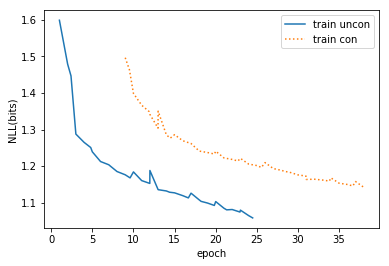

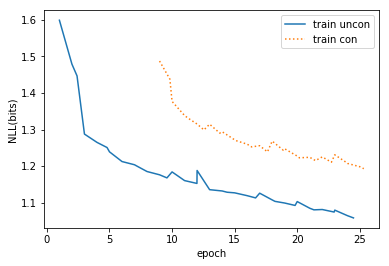

In [7]:
#uncon model
path = ('results_2t/models-two_tier-two_tier.py-expUNCON-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl'
       )
with open(path, 'rb') as f:
    param_vals = pickle.load(f)

#con fulllab model
path = ('FULLLAB_train_log.pkl')
with open(path, 'rb') as f:
    param_vals_fulllab = pickle.load(f)
compareLearningCurves(param_vals,param_vals_fulllab)

path = ('results_2t/models-two_tier-two_tier_con.py-expCON_T4T_UNCONINIT_FULLLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals_fulllab = pickle.load(f)
compareLearningCurves(param_vals,param_vals_fulllab)

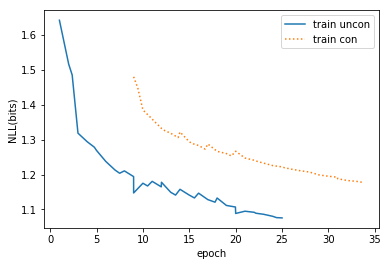

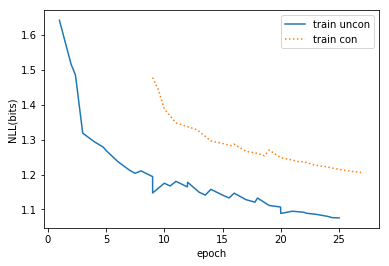

In [12]:
#zerolab model
path = ('results_2t/models-two_tier-two_tier_con.py-expZEROLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl'
       )
with open(path, 'rb') as f:
    param_vals_zerolab = pickle.load(f)
    
#fulllab model, ZLinit
path = ('results_2t/models-two_tier-two_tier_con.py-expCON_ZLINIT_FULLLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals_fulllab_ZLinit = pickle.load(f)
compareLearningCurves(param_vals_zerolab,param_vals_fulllab_ZLinit)

#fulllab model, ZLinit
path = ('results_2t/models-two_tier-two_tier_con.py-expCON_T4T_ZLINIT_FULLLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals_fulllab_ZLinit = pickle.load(f)
compareLearningCurves(param_vals_zerolab,param_vals_fulllab_ZLinit)

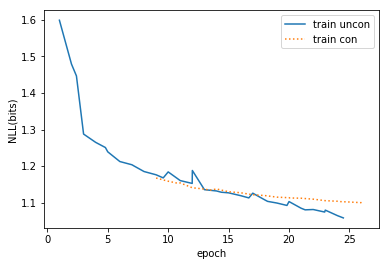

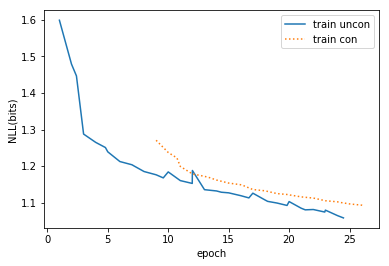

In [6]:
import pickle
#see if smaller learning rate reduces jump: yes! they do
path = ('results_2t/models-two_tier-two_tier_con.py-expCON_LR_T4T_UNCONINIT_FULLLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.0001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals_0001 = pickle.load(f)
compareLearningCurves(param_vals,param_vals_0001)

path = ('results_2t/models-two_tier-two_tier_con.py-expCON_LR_T4T_UNCONINIT_FULLLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.0005/train_log.pkl')
with open(path, 'rb') as f:
    param_vals_0005 = pickle.load(f)
compareLearningCurves(param_vals,param_vals_0005)

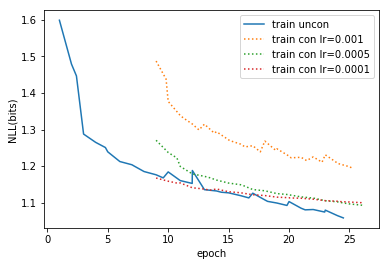

In [9]:
#put all lr cases in one plot
def compareLearningCurves(param_vals,param_vals_fulllab,param_vals_0005,param_vals_0001):
    y = param_vals
    xEpoch = np.array(y['iter'])/6400.0
    plt.plot(xEpoch,y['train NLL (bits)'],label='train uncon')

    y = param_vals_fulllab
    xEpoch = np.array(y['iter'])/6400.0 + 8
    plt.plot(xEpoch,y['train NLL (bits)'],':',label='train con lr=0.001')
    
    y = param_vals_0005
    xEpoch = np.array(y['iter'])/6400.0 + 8
    plt.plot(xEpoch,y['train NLL (bits)'],':',label='train con lr=0.0005')
    
    y = param_vals_0001
    xEpoch = np.array(y['iter'])/6400.0 + 8
    plt.plot(xEpoch,y['train NLL (bits)'],':',label='train con lr=0.0001')

    plt.ylabel('NLL(bits)')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    
compareLearningCurves(param_vals,param_vals_fulllab,param_vals_0005,param_vals_0001)

compare init with zero and init with RD: init with zero has better cost, but samples are similar

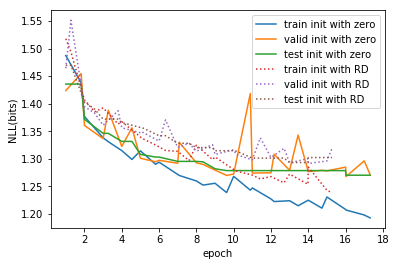

In [34]:
import cPickle as pickle
#init with zero
path = ('results_2t/models-two_tier-two_tier_con.py-expCON_T4T_UNCONINIT_FULLLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals = pickle.load(f)
    
#init with RD
path = ('results_2t/models-two_tier-two_tier_con_init.py-expCON_T4T_UNCONINIT_FL_INITRD-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals_RD = pickle.load(f)

#compare
param_vals_dict = {}
param_vals_dict['init with zero'] = param_vals
param_vals_dict['init with RD'] = param_vals_RD
#param_vals_dict['zerolab'] = param_vals_zerolab
checkLearningCurves(param_vals_dict)

put test/valid and accurate train in the same plot

In [30]:
def cmprLogTrue(path):
    #1 get cost
    with open(path, 'rb') as f:
        param_vals = pickle.load(f)
    cost_list,iter_list = getTrainCost(param_vals)

    #2 plot & compare
    xEpoch = np.array(iter_list)/6400.0
    plt.plot(xEpoch,cost_list,'m:',label='train true')
    
    log_cost_array = np.array(cost_list)
    log_cost_array = np.cumsum(log_cost_array)
    log_cost_array = numpy.true_divide(log_cost_array,xEpoch)
    plt.plot(xEpoch,log_cost_array,'b*',label='train true')

    param_vals_dict = {}
    param_vals_dict['log'] = param_vals
    checkLearningCurves(param_vals_dict)

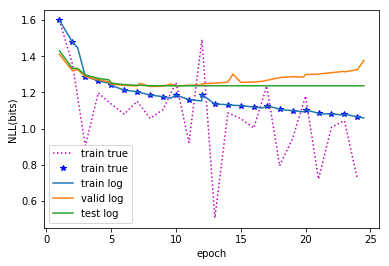

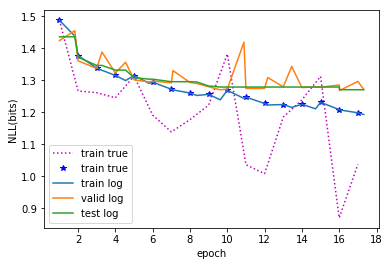

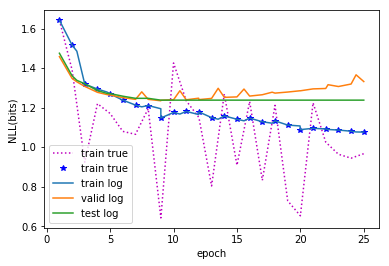

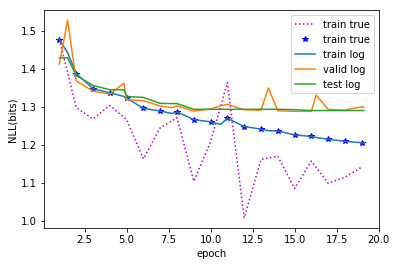

In [25]:
#uncon model
path = ('results_2t/models-two_tier-two_tier.py-expUNCON-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
cmprLogTrue(path)

#init with UC model
path = ('results_2t/models-two_tier-two_tier_con.py-expCON_T4T_UNCONINIT_FULLLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
cmprLogTrue(path)

#ZL model
path = ('results_2t/models-two_tier-two_tier_con.py-expZEROLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
cmprLogTrue(path)

#init with ZL model
path = ('results_2t/models-two_tier-two_tier_con.py-expCON_T4T_ZLINIT_FULLLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
cmprLogTrue(path)

try ulaw, precise lab (no quantization), 3t

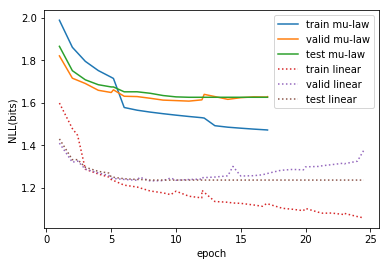

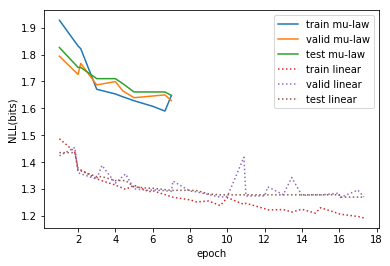

In [4]:
import cPickle as pickle
path = ('results_2t/models-two_tier-two_tier.py-expUNCON-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals = pickle.load(f)
    
path = ('results_2t/models-two_tier-two_tier.py-expUNCON_ULAW-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typemu-law-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals_RD = pickle.load(f)

#compare
param_vals_dict = {}
param_vals_dict['linear'] = param_vals
param_vals_dict['mu-law'] = param_vals_RD
checkLearningCurves(param_vals_dict)

path = ('results_2t/models-two_tier-two_tier_con.py-expCON_T4T_UNCONINIT_FULLLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals = pickle.load(f)
    
path = ('results_2t/models-two_tier-two_tier_con.py-expCON_ULAW_T4T_UCINIT_FL-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typemu-law-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals_RD = pickle.load(f)

#compare
param_vals_dict = {}
param_vals_dict['linear'] = param_vals
param_vals_dict['mu-law'] = param_vals_RD
checkLearningCurves(param_vals_dict)

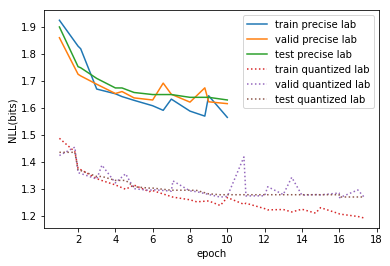

In [6]:
path = ('results_2t/models-two_tier-two_tier_con.py-expCON_T4T_UNCONINIT_FULLLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals = pickle.load(f)
    
path = ('results_2t/models-two_tier-two_tier_con.py-expCON_PCLAB_T4T_UCINIT_FL-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typemu-law-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals_RD = pickle.load(f)

#compare
param_vals_dict = {}
param_vals_dict['quantized lab'] = param_vals
param_vals_dict['precise lab'] = param_vals_RD
#param_vals_dict['zerolab'] = param_vals_zerolab
checkLearningCurves(param_vals_dict)

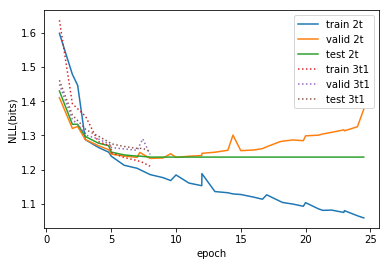

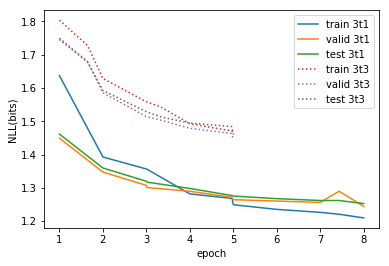

In [6]:
import cPickle as pickle
path = ('results_2t/models-two_tier-two_tier.py-expUNCON-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals = pickle.load(f)
    
path = ('results_3t/models-three_tier-three_tier.py-expUC-seq_len800-big_frame_size80-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-n_big_rnn1-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals_3t1 = pickle.load(f)
    
path = ('results_3t/models-three_tier-three_tier.py-expUC_3BIGRNN-seq_len800-big_frame_size80-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-n_big_rnn3-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals_3t3 = pickle.load(f)

#compare
param_vals_dict = {}
param_vals_dict['2t'] = param_vals
param_vals_dict['3t1'] = param_vals_3t1
checkLearningCurves(param_vals_dict)

param_vals_dict = {}
param_vals_dict['3t3'] = param_vals_3t3
param_vals_dict['3t1'] = param_vals_3t1
checkLearningCurves(param_vals_dict)

3t conditional

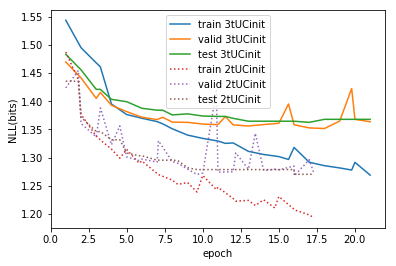

In [4]:
import cPickle as pickle
path = ('results_2t/models-two_tier-two_tier.py-expUNCON-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals = pickle.load(f)
    
path = ('results_3t/models-three_tier-three_tier_con.py-expUCINIT-seq_len800-big_frame_size80-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-n_big_rnn1-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals_3t = pickle.load(f)
    
path = ('results_2t/models-two_tier-two_tier_con.py-expCON_T4T_UNCONINIT_FULLLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals_2t = pickle.load(f)

#compare
param_vals_dict = {}
#param_vals_dict['UC'] = param_vals
param_vals_dict['3tUCinit'] = param_vals_3t
param_vals_dict['2tUCinit'] = param_vals_2t
checkLearningCurves(param_vals_dict)

longer mini seq

In [9]:
def checkLearningCurves_Long(param_vals_dict):
    cnt = 0
    styleList = ['',':','x']
    for key,param_vals in param_vals_dict.iteritems():
        rate = float(param_vals['iter'][0])/float(param_vals['epoch'][0])
        xEpoch = np.array(param_vals['iter'])/rate
        style = styleList[cnt%3]
        cnt += 1
        plt.plot(xEpoch,param_vals['train NLL (bits)'],style,label='train '+key)
        plt.plot(xEpoch,param_vals['valid NLL (bits)'],style,label='valid '+key)
        plt.plot(xEpoch,param_vals['test NLL (bits)'],style,label='test '+key)
        plt.legend()
    plt.ylabel('NLL(bits)')
    plt.xlabel('epoch')
    plt.show()

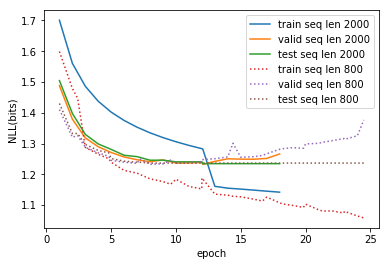

In [10]:
import cPickle as pickle
path = ('results_2t/models-two_tier-two_tier.py-expUNCON-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals = pickle.load(f)
    
path = ('results_2t/models-two_tier-two_tier.py-expUC_SEQLEN-n_frames100-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals_long = pickle.load(f)

#compare
param_vals_dict = {}
param_vals_dict['seq len 800'] = param_vals
param_vals_dict['seq len 2000'] = param_vals_long
# checkLearningCurves(param_vals_dict)
checkLearningCurves_Long(param_vals_dict)

In [10]:
print(param_vals_long['iter'])
print(param_vals_long['epoch'])

[2561, 5121, 7681, 10241, 12801, 15361, 17921, 20481, 23041, 25601, 28161, 30721, 30886, 33281, 35841]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 13, 14]


# compute relatively accurate training cost

In [6]:
import cPickle as pickle
import matplotlib.pyplot as plt

def getTrainCost(param_vals):
    #1 read train log
    log_cost_list = param_vals['train NLL (bits)']
    iter_list = param_vals['iter']

    ep_iter_list = []
    ep_lc_list = []
    for i,v in enumerate(iter_list):
        if (v-1)%6400==0:
            ep_iter_list.append(v)
            ep_lc_list.append(log_cost_list[i])
    log_cost_list = ep_lc_list
    iter_list = ep_iter_list

    #2 compute cost
    cost_list = []
    cost_list.append(log_cost_list[0])
    for i in range(1,len(log_cost_list)):
        tmp = iter_list[i]*log_cost_list[i] - iter_list[i-1]*log_cost_list[i-1]
        tmp /= (iter_list[i] - iter_list[i-1])
        cost_list.append(tmp)

    #3 print
    # print(len(log_cost_list),len(cost_list))
    # print(log_cost_list)
    # print(cost_list)
    
    return cost_list,iter_list

def cmprSelf(param_vals,cost_list,iter_list):
    ep_true = numpy.array(iter_list)/6400.0
    ep_log = numpy.array(param_vals['iter'])/6400.0
    plt.plot(ep_log,param_vals['train NLL (bits)'],label='log cost')
    plt.plot(ep_true,cost_list,label='true cost')
    plt.legend()
    plt.show()

In [46]:
xEpoch = np.array(iter_list)/6400.0
plt.plot(xEpoch,log_cost_list)
plt.plot(xEpoch,cost_list)
plt.ylim([0.4,1.7])
# plt.show()

(0.4, 1.7)

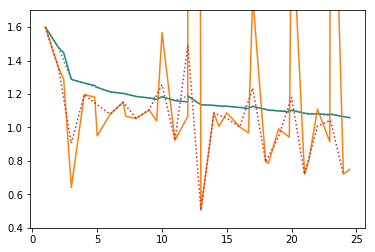

In [48]:
xEpoch = np.array(iter_list)/6400.0
plt.plot(xEpoch,log_cost_list,':')
plt.plot(xEpoch,cost_list,':')
plt.ylim([0.4,1.7])
plt.show()

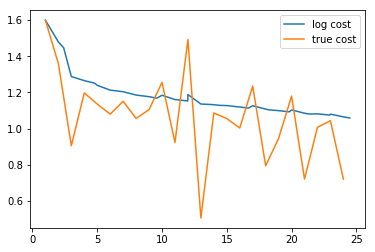

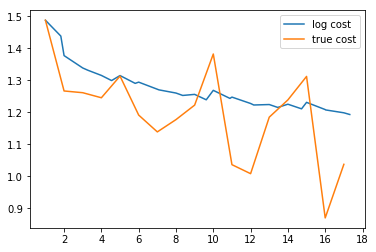

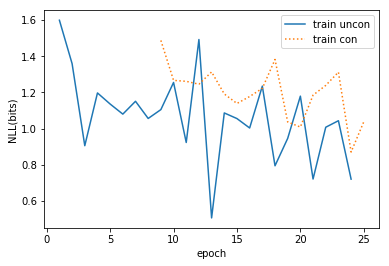

In [29]:
#1 get cost
#uncon model
path = ('results_2t/models-two_tier-two_tier.py-expUNCON-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl'
       )
with open(path, 'rb') as f:
    param_vals = pickle.load(f)
cost_list,iter_list = getTrainCost(param_vals)

#init with UNCON model
path = ('results_2t/models-two_tier-two_tier_con.py-expCON_T4T_UNCONINIT_FULLLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals_UC = pickle.load(f)
cost_list_UC,iter_list_UC = getTrainCost(param_vals_UC)

#2 compare with self - avg cost
cmprSelf(param_vals,cost_list,iter_list)
cmprSelf(param_vals_UC,cost_list_UC,iter_list_UC)

#3 compare with others
param_vals['train NLL (bits)'],param_vals['iter'] = cost_list,iter_list
param_vals_UC['train NLL (bits)'],param_vals_UC['iter'] = cost_list_UC,iter_list_UC
compareLearningCurves(param_vals,param_vals_UC)

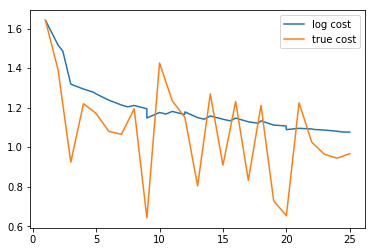

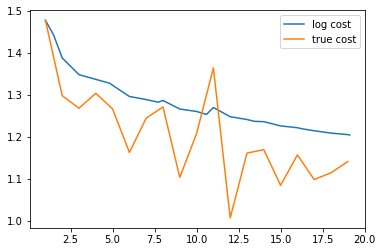

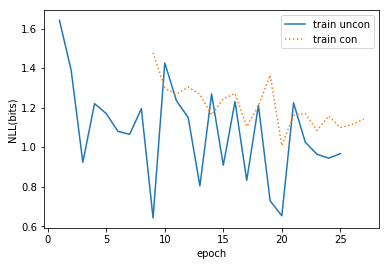

In [31]:
#1 get cost
#zerolab model
path = ('results_2t/models-two_tier-two_tier_con.py-expZEROLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals = pickle.load(f)
cost_list,iter_list = getTrainCost(param_vals)

#init with ZL model
path = ('results_2t/models-two_tier-two_tier_con.py-expCON_T4T_ZLINIT_FULLLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/train_log.pkl')
with open(path, 'rb') as f:
    param_vals_ZL = pickle.load(f)
cost_list_ZL,iter_list_ZL = getTrainCost(param_vals_ZL)

#2 compare with self - avg cost
cmprSelf(param_vals,cost_list,iter_list)
cmprSelf(param_vals_ZL,cost_list_ZL,iter_list_ZL)

#3 compare with others
param_vals['train NLL (bits)'],param_vals['iter'] = cost_list,iter_list
param_vals_ZL['train NLL (bits)'],param_vals_ZL['iter'] = cost_list_ZL,iter_list_ZL
compareLearningCurves(param_vals,param_vals_ZL)

In [ ]:
#compare
param_vals_dict = {}
param_vals_dict['uncon'] = param_vals
param_vals_dict['con div lab'] = param_vals_con
#param_vals_dict['zerolab'] = param_vals_zerolab
checkLearningCurves(param_vals_dict)

script for accurate computing

In [60]:
import os
directory = 'results_2t/models-two_tier-two_tier.py-expUNCON-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/params/'
for filename in os.listdir(directory):
    print(filename)
    start = filename.find('_i') + 2
    end = filename.find('_t')
    if filename.find('_i')!=-1:
        i = float(filename[start:end])
        print(i)

.ipynb_checkpoints
params_e8_i51201_t20.00_tr1.4268_v1.2326_best.pkl
51201.0
params_e16_i102401_t40.02_tr1.2874_v1.2571.pkl
102401.0
params_e7_i44801_t17.50_tr1.4268_v1.2356_best.pkl
44801.0
params_e24_i156761_t72.00_tr0.7655_v1.3766.pkl
156761.0


In [67]:
directory = 'results_2t/models-two_tier-two_tier_con.py-expCON_T4T_UNCONINIT_FULLLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/params/'
for filename in os.listdir(directory):
    print(filename)
    start = filename.find('_i') + 2
    end = filename.find('_t')
    if filename.find('_i')!=-1:
        i = float(filename[start:end])
        print(i)

params_e15_i96001_t61.25_tr1.4134_v1.2783.pkl
96001.0
params_e12_i76801_t47.23_tr1.4459_v1.2748.pkl
76801.0
params_e13_i86116_t54.00_tr1.3329_v1.3431.pkl
86116.0
params_e11_i70401_t42.53_tr1.4440_v1.2743.pkl
70401.0
params_e14_i94288_t60.00_tr0.9255_v1.2794.pkl
94288.0
params_e5_i37201_t18.00_tr1.6588_v1.2948_best.pkl
37201.0
params_e9_i57601_t33.00_tr1.4756_v1.2797_best.pkl
57601.0
params_e9_i61586_t36.00_tr1.2286_v1.2701_best.pkl
61586.0
params_e4_i25601_t9.39_tr1.5625_v1.3226_best.pkl
25601.0
params_e10_i64001_t37.81_tr1.4748_v1.2726.pkl
64001.0
params_e16_i102401_t65.93_tr1.3898_v1.2851.pkl
102401.0
params_e3_i20982_t6.00_tr1.4147_v1.3882.pkl
20982.0
params_e12_i77889_t48.00_tr0.9577_v1.3084.pkl
77889.0
params_e7_i45348_t24.00_tr1.4866_v1.3299.pkl
45348.0
params_e16_i102541_t66.00_tr1.1409_v1.2679_best.pkl
102541.0
params_e1_i6401_t3.33_tr1.6628_v1.4238_best.pkl
6401.0
params_e7_i44801_t23.60_tr1.4928_v1.2920_best.pkl
44801.0
params_e6_i38401_t18.90_tr1.5303_v1.2974.pkl
38401.0
par

In [1]:
#see if ok
import numpy as  np
tmp = 'results_2t/models-two_tier-two_tier_con.py-expCON_T4T_UNCONINIT_FULLLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/'
c = np.load(tmp+'trainCost.npy')
i = np.load(tmp+'trainIter.npy')
print(i,c)

(array([ 96001.]), array([ 1.25937426], dtype=float32))


In [1]:
list1 = [3,2,4,1, 1]
list2 = ['three', 'two', 'four', 'one', 'one2']
list1, list2 = zip(*sorted(zip(list1, list2)))
print(type(list1))
print(list2)
list1 = [3,2,4,1, 1]
list2 = ['three', 'two', 'four', 'one', 'one2']
list1, list2 = (list(t) for t in zip(*sorted(zip(list1, list2))))
print(type(list1))
print(list2)

<type 'tuple'>
('one', 'one2', 'two', 'three', 'four')
<type 'list'>
['one', 'one2', 'two', 'three', 'four']


use accurate training cost

In [20]:
import numpy as np
def cmprLogAccu(path):
    #1 get cost
    trainCost = np.load(path+'trainCost.npy')
    trainIter = np.load(path+'trainIter.npy')
    with open(path+'train_log.pkl', 'rb') as f:
        param_vals = pickle.load(f)

    #2 plot & compare
    xEpoch = np.array(trainIter)/6400.0
    plt.plot(xEpoch,trainCost,'m:',label='train true')
    
#     log_cost_array = np.array(cost_list)
#     log_cost_array = np.cumsum(log_cost_array)
#     log_cost_array = numpy.true_divide(log_cost_array,xEpoch)
#     plt.plot(xEpoch,log_cost_array,'b*',label='train true')

    param_vals_dict = {}
    param_vals_dict['log'] = param_vals
    checkLearningCurves(param_vals_dict)

In [18]:
path = 'results_2t/models-two_tier-two_tier_con.py-expCON_T4T_UNCONINIT_FULLLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/'
trainCost = np.load(path+'trainCost.npy')
trainIter = np.load(path+'trainIter.npy')
print(trainCost)
print(trainIter)

[ 1.43362796  1.38419712  1.33160996  1.30264735  1.30335665  1.29496002
  1.31390655  1.27880168  1.2799679   1.26887274  1.26819789  1.26605332
  1.27712476  1.30516696  1.25782239  1.25937426  1.2607249   1.25452805]
[   6401.   20982.   25601.   37201.   38401.   44801.   45348.   57601.
   61586.   64001.   70401.   76801.   77889.   86116.   94288.   96001.
  102401.  102541.]


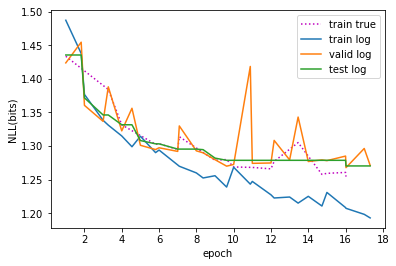

In [21]:
cmprLogAccu(path)

In [31]:
pathUC = 'results_2t/models-two_tier-two_tier.py-expUNCON-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/'
trainCost = np.load(pathUC+'trainCost.npy')
trainIter = np.load(pathUC+'trainIter.npy')
print(trainCost)
print(trainIter)

[ 1.22102273]
[ 51201.]


In [17]:
def cmprLogAccu(path,pathUC):
    #1 get cost
    trainCost = np.load(path+'trainCost.npy')
    trainIter = np.load(path+'trainIter.npy')

    #2 plot & compare
    xEpoch = np.array(trainIter)/6400.0 + 8
    plt.plot(xEpoch,trainCost,'',label='train true - con UCinit')

    trainCost = np.load(pathUC+'trainCost.npy')
    trainIter = np.load(pathUC+'trainIter.npy')
    xEpoch = np.array(trainIter)/6400.0
    plt.plot(xEpoch,trainCost,'x',label='train true - uncon')
    
    plt.xlabel('epoch')
    plt.ylabel('NLL(bits)')
    plt.legend()
    plt.show()

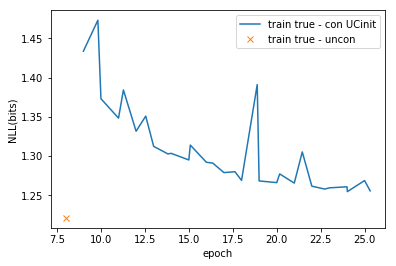

In [18]:
path = 'results_2t/models-two_tier-two_tier_con.py-expCON_T4T_UNCONINIT_FULLLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/'
pathUC = 'results_2t/models-two_tier-two_tier.py-expUNCON-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/'
cmprLogAccu(path,pathUC)

In [29]:
def compareLearningCurves(param_vals,param_vals_fulllab,path,pathUC):
    y = param_vals
    xEpoch = np.array(y['iter'])/6400.0
    plt.plot(xEpoch,y['train NLL (bits)'],label='approximate train cost - uncon')

    y = param_vals_fulllab
    xEpoch = np.array(y['iter'])/6400.0 + 8
    plt.plot(xEpoch,y['train NLL (bits)'],'',label='approximate train cost - con')
    
    #1 get cost
    trainCost = np.load(path+'trainCost.npy')
    trainIter = np.load(path+'trainIter.npy')

    #2 plot & compare
    xEpoch = np.array(trainIter)/6400.0 + 8
    plt.plot(xEpoch,trainCost,':',label='accurate train cost - con')

    trainCost = np.load(pathUC+'trainCost.npy')
    trainIter = np.load(pathUC+'trainIter.npy')
    xEpoch = np.array(trainIter)/6400.0
    plt.plot(xEpoch,trainCost,'x',label='accurate train cost - uncon')

    plt.ylabel('NLL(bits)')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

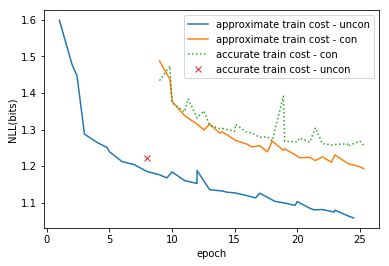

In [30]:
compareLearningCurves(param_vals,param_vals_fulllab,path,pathUC)

# check what is loaded from pkl

In [9]:
import cPickle as pickle

#con
path = ('results_2t/models-two_tier-two_tier_con.py-expZEROLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/params/params_e8_i57583_t12.00_tr1.3151_v1.2346_best.pkl')
with open(path, 'rb') as f:
    param_vals = pickle.load(f)
print(len(param_vals))

37


In [10]:
for name in sorted(param_vals):
    val = param_vals[name]
    print(name,type(val),val.shape)

('FrameLevel.GRU1.Step.Input.W0', <type 'numpy.ndarray'>, (621, 3072))
('FrameLevel.GRU1.Step.Input.b', <type 'numpy.ndarray'>, (3072,))
('FrameLevel.GRU1.Step.Input.g0', <type 'numpy.ndarray'>, (3072,))
('FrameLevel.GRU1.Step.Recurrent_Candidate.W0', <type 'numpy.ndarray'>, (1024, 1024))
('FrameLevel.GRU1.Step.Recurrent_Candidate.g0', <type 'numpy.ndarray'>, (1024,))
('FrameLevel.GRU1.Step.Recurrent_Gates.W0', <type 'numpy.ndarray'>, (1024, 2048))
('FrameLevel.GRU1.Step.Recurrent_Gates.g0', <type 'numpy.ndarray'>, (2048,))
('FrameLevel.GRU2.Step.Input.W0', <type 'numpy.ndarray'>, (1024, 3072))
('FrameLevel.GRU2.Step.Input.b', <type 'numpy.ndarray'>, (3072,))
('FrameLevel.GRU2.Step.Input.g0', <type 'numpy.ndarray'>, (3072,))
('FrameLevel.GRU2.Step.Recurrent_Candidate.W0', <type 'numpy.ndarray'>, (1024, 1024))
('FrameLevel.GRU2.Step.Recurrent_Candidate.g0', <type 'numpy.ndarray'>, (1024,))
('FrameLevel.GRU2.Step.Recurrent_Gates.W0', <type 'numpy.ndarray'>, (1024, 2048))
('FrameLevel.GRU

# make uncon_para_expand

In [3]:
import cPickle as pickle

#con
path = ('results_2t/models-two_tier-two_tier_con.py-expZEROLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/params/params_e8_i57583_t12.00_tr1.3151_v1.2346_best.pkl')
with open(path, 'rb') as f:
    param_vals = pickle.load(f)
print(len(param_vals))

37


In [9]:
for name, val in param_vals.iteritems():
    if 'Frame' in name and 'GRU1' in name:
        print(name,type(val),val.shape)

('FrameLevel.GRU1.Step.Input.b', <type 'numpy.ndarray'>, (3072,))
('FrameLevel.GRU1.Step.Recurrent_Candidate.g0', <type 'numpy.ndarray'>, (1024,))
('FrameLevel.GRU1.Step.Recurrent_Gates.g0', <type 'numpy.ndarray'>, (2048,))
('FrameLevel.GRU1.Step.Input.W0', <type 'numpy.ndarray'>, (621, 3072))
('FrameLevel.GRU1.Step.Recurrent_Candidate.W0', <type 'numpy.ndarray'>, (1024, 1024))
('FrameLevel.GRU1.Step.Input.g0', <type 'numpy.ndarray'>, (3072,))
('FrameLevel.GRU1.Step.Recurrent_Gates.W0', <type 'numpy.ndarray'>, (1024, 2048))


In [2]:
#1 read uncon
path = ('results_2t/models-two_tier-two_tier.py-expUNCON-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/params/params_e8_i51201_t20.00_tr1.4268_v1.2326_best.pkl'
       )
with open(path, 'rb') as f:
    param_vals_uncon = pickle.load(f)
print(len(param_vals_uncon))

37


In [10]:
for name, val in param_vals_uncon.iteritems():
    if 'Frame' in name and 'GRU1' in name:
        print(name,type(val),val.shape)

('FrameLevel.GRU1.Step.Input.b', <type 'numpy.ndarray'>, (3072,))
('FrameLevel.GRU1.Step.Recurrent_Candidate.g0', <type 'numpy.ndarray'>, (1024,))
('FrameLevel.GRU1.Step.Recurrent_Gates.g0', <type 'numpy.ndarray'>, (2048,))
('FrameLevel.GRU1.Step.Input.W0', <type 'numpy.ndarray'>, (20, 3072))
('FrameLevel.GRU1.Step.Recurrent_Candidate.W0', <type 'numpy.ndarray'>, (1024, 1024))
('FrameLevel.GRU1.Step.Input.g0', <type 'numpy.ndarray'>, (3072,))
('FrameLevel.GRU1.Step.Recurrent_Gates.W0', <type 'numpy.ndarray'>, (1024, 2048))


In [11]:
#2 modify weight
import numpy
np = numpy

w_uncon = param_vals_uncon['FrameLevel.GRU1.Step.Input.W0']
print(w_uncon.shape)
print(w_uncon[:,0])

w_uncon = numpy.concatenate((w_uncon,numpy.zeros((601,3072),dtype='float32')))
print(w_uncon.shape)
print(w_uncon[:,0])

(20, 3072)
[ 0.27434748 -0.17999072  0.36063015  0.24118549  0.2284665   0.50198418
  0.53452498 -0.1036838   0.10498376 -0.12283515 -0.28122878 -0.26983115
  0.07461417  0.56752449  0.32709569  0.5468381   0.40683606  0.10855817
 -0.09316391  0.38025722]
(621, 3072)
[ 0.27434748 -0.17999072  0.36063015  0.24118549  0.2284665   0.50198418
  0.53452498 -0.1036838   0.10498376 -0.12283515 -0.28122878 -0.26983115
  0.07461417  0.56752449  0.32709569  0.5468381   0.40683606  0.10855817
 -0.09316391  0.38025722  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0

In [12]:
#3 save into pickle
uncon_para_expand = param_vals_uncon
uncon_para_expand['FrameLevel.GRU1.Step.Input.W0'] = w_uncon
print(uncon_para_expand['FrameLevel.GRU1.Step.Input.W0'].shape)

(621, 3072)


In [13]:
path = 'uncon_para_expand.pkl'
with open(path, 'wb') as f:
    pickle.dump(uncon_para_expand, f)

In [35]:
#see if ok
path = 'uncon_para_expand.pkl'
with open(path, 'rb') as f:
    uncon_para_expand = pickle.load(f)
print(param_vals_uncon['FrameLevel.GRU1.Step.Input.b'])
print(uncon_para_expand['FrameLevel.GRU1.Step.Input.b'])
print(param_vals_uncon['FrameLevel.GRU1.Step.Input.W0'])
print(uncon_para_expand['FrameLevel.GRU1.Step.Input.W0'])

[ 0.76032436  0.08962844  0.89264798 ...,  0.02398754  0.00105636
  0.21034464]
[ 0.76032436  0.08962844  0.89264798 ...,  0.02398754  0.00105636
  0.21034464]
[[ 0.27434748  0.12573121  0.60219377 ..., -0.46980751 -0.03317712
   0.03368484]
 [-0.17999072 -0.12741707  0.40956619 ..., -0.4672763   0.18423784
  -0.42358789]
 [ 0.36063015 -0.13104287  0.46375373 ...,  0.30481151  0.30339473
  -0.24447156]
 ..., 
 [ 0.10855817 -0.7171877  -0.13359424 ...,  0.24296241 -0.21446875
  -0.49045774]
 [-0.09316391 -0.41434327  0.09230169 ..., -0.40490299  0.42249739
  -0.13850331]
 [ 0.38025722 -0.60587347  0.30648872 ...,  0.40783301 -0.359065
   0.13020653]]
[[ 0.27434748  0.12573121  0.60219377 ..., -0.46980751 -0.03317712
   0.03368484]
 [-0.17999072 -0.12741707  0.40956619 ..., -0.4672763   0.18423784
  -0.42358789]
 [ 0.36063015 -0.13104287  0.46375373 ...,  0.30481151  0.30339473
  -0.24447156]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.    

In [1]:
import pickle
#see if ok
path = 'uncon_para_expand.pkl'
with open(path, 'rb') as f:
    uncon_para_expand = pickle.load(f)
print(uncon_para_expand['FrameLevel.GRU1.Step.Input.b'])
print(uncon_para_expand['FrameLevel.GRU1.Step.Input.W0'])

[ 0.76032436  0.08962844  0.89264798 ...,  0.02398754  0.00105636
  0.21034464]
[[ 0.27434748  0.12573121  0.60219377 ..., -0.46980751 -0.03317712
   0.03368484]
 [-0.17999072 -0.12741707  0.40956619 ..., -0.4672763   0.18423784
  -0.42358789]
 [ 0.36063015 -0.13104287  0.46375373 ...,  0.30481151  0.30339473
  -0.24447156]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


# make uncon_para_expand: using another starting point

In [2]:
#1 read zerolab
import pickle
path = ('results_2t/models-two_tier-two_tier_con.py-expZEROLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/params/params_e8_i57583_t12.00_tr1.3151_v1.2346_best.pkl'
       )
with open(path, 'rb') as f:
    param_vals_uncon = pickle.load(f)

In [3]:
for name, val in param_vals_uncon.iteritems():
    if 'Frame' in name and 'GRU1' in name:
        print(name,type(val),val.shape)

('FrameLevel.GRU1.Step.Input.b', <type 'numpy.ndarray'>, (3072,))
('FrameLevel.GRU1.Step.Recurrent_Candidate.g0', <type 'numpy.ndarray'>, (1024,))
('FrameLevel.GRU1.Step.Recurrent_Gates.g0', <type 'numpy.ndarray'>, (2048,))
('FrameLevel.GRU1.Step.Input.W0', <type 'numpy.ndarray'>, (621, 3072))
('FrameLevel.GRU1.Step.Recurrent_Candidate.W0', <type 'numpy.ndarray'>, (1024, 1024))
('FrameLevel.GRU1.Step.Input.g0', <type 'numpy.ndarray'>, (3072,))
('FrameLevel.GRU1.Step.Recurrent_Gates.W0', <type 'numpy.ndarray'>, (1024, 2048))


In [4]:
#2 modify weight
import numpy
np = numpy

w_uncon = param_vals_uncon['FrameLevel.GRU1.Step.Input.W0'][:20,:]
print(w_uncon.shape)
print(w_uncon[:,0])

w_uncon = numpy.concatenate((w_uncon,numpy.zeros((601,3072),dtype='float32')))
print(w_uncon.shape)
print(w_uncon[:,0])

(20, 3072)
[-0.21101639 -0.20546871 -0.02223745  0.08006883  0.21736649  0.47101033
  0.76764232  0.61233294  0.39494339  0.10330783 -0.0407108  -0.11018097
  0.0169275   0.14355975  0.2041904   0.24410613  0.12229323 -0.01555579
 -0.27786463 -0.28790551]
(621, 3072)
[-0.21101639 -0.20546871 -0.02223745  0.08006883  0.21736649  0.47101033
  0.76764232  0.61233294  0.39494339  0.10330783 -0.0407108  -0.11018097
  0.0169275   0.14355975  0.2041904   0.24410613  0.12229323 -0.01555579
 -0.27786463 -0.28790551  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0

In [5]:
#3 save into pickle
uncon_para_expand = param_vals_uncon
uncon_para_expand['FrameLevel.GRU1.Step.Input.W0'] = w_uncon
print(uncon_para_expand['FrameLevel.GRU1.Step.Input.W0'].shape)

(621, 3072)


In [6]:
path = 'uncon_para_expand.pkl'
with open(path, 'wb') as f:
    pickle.dump(uncon_para_expand, f)

In [7]:
#see if ok
path = 'uncon_para_expand.pkl'
with open(path, 'rb') as f:
    uncon_para_expand = pickle.load(f)
print(param_vals_uncon['FrameLevel.GRU1.Step.Input.b'])
print(uncon_para_expand['FrameLevel.GRU1.Step.Input.b'])
print(param_vals_uncon['FrameLevel.GRU1.Step.Input.W0'])
print(uncon_para_expand['FrameLevel.GRU1.Step.Input.W0'])

[ -3.63866031e-01  -5.10929711e-02  -7.85356522e-01 ...,   1.85199053e-04
  -1.22577958e-01   8.71710479e-02]
[ -3.63866031e-01  -5.10929711e-02  -7.85356522e-01 ...,   1.85199053e-04
  -1.22577958e-01   8.71710479e-02]
[[-0.21101639 -0.18233204 -0.15725946 ..., -0.11624295  0.0262572
  -0.07423826]
 [-0.20546871 -0.210269   -0.02940577 ..., -0.03753022  0.10399548
  -0.39094871]
 [-0.02223745 -0.21742958  0.07119403 ...,  0.09829068  0.12815918
  -0.10646724]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]
[[-0.21101639 -0.18233204 -0.15725946 ..., -0.11624295  0.0262572
  -0.07423826]
 [-0.20546871 -0.210269   -0.02940577 ..., -0.03753022  0.10399548
  -0.39094871]
 [-0.02223745 -0.21742958  0.07119403 ...,  0.09829068  0.12815918
  -0.10646724]
 ..., 
 [ 0.          0.          0.      

# make uncon_para_expand_3t

In [23]:
#1 read zerolab
import pickle
path = ('results_3t/models-three_tier-three_tier.py-expUC-seq_len800-big_frame_size80-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-n_big_rnn1-lr0.001/params/params_e8_i51201_t37.97_tr1.4315_v1.2441_best.pkl')
with open(path, 'rb') as f:
    param_vals_uncon = pickle.load(f)

In [15]:
for name, val in param_vals_uncon.iteritems():
    if 'Frame' in name and ('W0' in name and 'Input' in name):
        print(name,type(val),val.shape)

('FrameLevel.GRU1.Step.Input.W0', <type 'numpy.ndarray'>, (1024, 3072))
('FrameLevel.GRU3.Step.Input.W0', <type 'numpy.ndarray'>, (1024, 3072))
('FrameLevel.GRU2.Step.Input.W0', <type 'numpy.ndarray'>, (1024, 3072))
('FrameLevel.InputExpand.W0', <type 'numpy.ndarray'>, (20, 1024))
('BigFrameLevel.GRU1.Step.Input.W0', <type 'numpy.ndarray'>, (80, 3072))


In [19]:
#2 modify weight
import numpy
np = numpy

w_uncon = param_vals_uncon['BigFrameLevel.GRU1.Step.Input.W0']
print(w_uncon.shape)
# print(w_uncon[:,0])

w_uncon_3 = numpy.concatenate((w_uncon,numpy.zeros((601,3072),dtype='float32')))
print(w_uncon_3.shape)
# print(w_uncon_3[:,0])

w_uncon = param_vals_uncon['FrameLevel.InputExpand.W0']
print(w_uncon.shape)
# print(w_uncon[:,0])

w_uncon_2 = numpy.concatenate((w_uncon,numpy.zeros((601,1024),dtype='float32')))
print(w_uncon_2.shape)
# print(w_uncon_2[:,0])

(80, 3072)
(681, 3072)
(20, 1024)
(621, 1024)


In [20]:
#3 save into pickle
uncon_para_expand = param_vals_uncon
uncon_para_expand['BigFrameLevel.GRU1.Step.Input.W0'] = w_uncon_3
uncon_para_expand['FrameLevel.InputExpand.W0'] = w_uncon_2
print(uncon_para_expand['BigFrameLevel.GRU1.Step.Input.W0'].shape)
print(uncon_para_expand['FrameLevel.InputExpand.W0'].shape)

(681, 3072)
(621, 1024)


In [21]:
path = 'uncon_para_expand_3t.pkl'
with open(path, 'wb') as f:
    pickle.dump(uncon_para_expand, f)

In [24]:
#see if ok
path = 'uncon_para_expand_3t.pkl'
with open(path, 'rb') as f:
    uncon_para_expand = pickle.load(f)
print(uncon_para_expand['BigFrameLevel.GRU1.Step.Input.W0'])
print(uncon_para_expand['FrameLevel.InputExpand.W0'])
print(param_vals_uncon['BigFrameLevel.GRU1.Step.Input.W0'])
print(param_vals_uncon['FrameLevel.InputExpand.W0'])

[[-0.3313919  -0.20711137 -0.00950056 ..., -0.19206913 -0.19452333
   0.05608345]
 [-0.36987397 -0.29649872 -0.08450253 ..., -0.1556049  -0.06683862
  -0.19397306]
 [-0.27187133 -0.14320755  0.08006527 ...,  0.31494811  0.1790075
  -0.12781882]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]
[[ 0.1040616   0.39797279 -0.55336928 ...,  0.13489386  0.36873305
   0.23916149]
 [ 0.0558529  -0.53416187 -0.39573857 ..., -0.11472034  0.42444408
   0.38050699]
 [-0.20922457 -0.16926949  0.42106667 ..., -0.44752008  0.11358078
  -0.12577705]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]
[[-0.3313919 

# make uncon_para_expand_long

In [2]:
#1 read zerolab
import pickle
path = ('results_2t/models-two_tier-two_tier.py-expUC_SEQLEN-n_frames100-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/params/params_e12_i30886_t24.00_tr1.3047_v1.2324_best.pkl')
with open(path, 'rb') as f:
    param_vals_uncon = pickle.load(f)

In [3]:
for name, val in param_vals_uncon.iteritems():
    if 'Frame' in name and ('W0' in name and 'Input' in name):
        print(name,type(val),val.shape)

('FrameLevel.GRU1.Step.Input.W0', <type 'numpy.ndarray'>, (20, 3072))
('FrameLevel.GRU3.Step.Input.W0', <type 'numpy.ndarray'>, (1024, 3072))
('FrameLevel.GRU2.Step.Input.W0', <type 'numpy.ndarray'>, (1024, 3072))


In [4]:
#2 modify weight
import numpy
np = numpy

w_uncon = param_vals_uncon['FrameLevel.GRU1.Step.Input.W0']
print(w_uncon.shape)
# print(w_uncon[:,0])

w_uncon_2 = numpy.concatenate((w_uncon,numpy.zeros((601,3072),dtype='float32')))
print(w_uncon_2.shape)
# print(w_uncon_2[:,0])

(20, 3072)
(621, 3072)


In [5]:
#3 save into pickle
uncon_para_expand = param_vals_uncon
uncon_para_expand['FrameLevel.GRU1.Step.Input.W0'] = w_uncon_2
print(uncon_para_expand['FrameLevel.GRU1.Step.Input.W0'].shape)

(621, 3072)


In [6]:
path = 'uncon_para_expand_long.pkl'
with open(path, 'wb') as f:
    pickle.dump(uncon_para_expand, f)

# see how weights change when init with uncon

In [58]:
def checkWeightEvolution(param_vals_uncon,param_vals_init):
    w_uncon = param_vals_uncon['FrameLevel.GRU1.Step.Input.W0']
    #print(w_uncon.shape)
    w_init = param_vals_init['FrameLevel.GRU1.Step.Input.W0'][:20,:]
    #print(w_init.shape)

    print('delta - weight for wav: ' + str(numpy.sum(abs(w_uncon-w_init))))
    print(numpy.sum(abs(w_uncon)))
    print(numpy.sum(abs(w_init)))
    w_lab = param_vals_init['FrameLevel.GRU1.Step.Input.W0'][20:,:]
    #print(w_lab.shape)
    print('importance - weight for lab: ' + str(numpy.sum(abs(w_lab))))

In [1]:
import cPickle as pickle

#1 read uncon
path = ('results_2t/models-two_tier-two_tier.py-expUNCON-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/params/params_e8_i51201_t20.00_tr1.4268_v1.2326_best.pkl'
       )
with open(path, 'rb') as f:
    param_vals_uncon = pickle.load(f)
print(len(param_vals_uncon))

37


In [11]:
for name, val in param_vals_uncon.iteritems():
    if 'Frame' in name and 'GRU1' in name:
        print(name,type(val),val.shape)

('FrameLevel.GRU1.Step.Input.b', <type 'numpy.ndarray'>, (3072,))
('FrameLevel.GRU1.Step.Recurrent_Candidate.g0', <type 'numpy.ndarray'>, (1024,))
('FrameLevel.GRU1.Step.Recurrent_Gates.g0', <type 'numpy.ndarray'>, (2048,))
('FrameLevel.GRU1.Step.Input.W0', <type 'numpy.ndarray'>, (20, 3072))
('FrameLevel.GRU1.Step.Recurrent_Candidate.W0', <type 'numpy.ndarray'>, (1024, 1024))
('FrameLevel.GRU1.Step.Input.g0', <type 'numpy.ndarray'>, (3072,))
('FrameLevel.GRU1.Step.Recurrent_Gates.W0', <type 'numpy.ndarray'>, (1024, 2048))


In [94]:
#2 read init with uncon, ep1
path = ('results_2t/models-two_tier-two_tier_con.py-expCON_UNCONINIT-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/params/params_e1_i6401_t2.65_tr1.7774_v1.5215_best.pkl'
       )
with open(path, 'rb') as f:
    param_vals_init = pickle.load(f)
print(len(param_vals_init))

37


In [12]:
for name, val in param_vals_init.iteritems():
    if 'Frame' in name and 'GRU1' in name:
        print(name,type(val),val.shape)

('FrameLevel.GRU1.Step.Input.b', <type 'numpy.ndarray'>, (3072,))
('FrameLevel.GRU1.Step.Recurrent_Candidate.g0', <type 'numpy.ndarray'>, (1024,))
('FrameLevel.GRU1.Step.Recurrent_Gates.g0', <type 'numpy.ndarray'>, (2048,))
('FrameLevel.GRU1.Step.Input.W0', <type 'numpy.ndarray'>, (621, 3072))
('FrameLevel.GRU1.Step.Recurrent_Candidate.W0', <type 'numpy.ndarray'>, (1024, 1024))
('FrameLevel.GRU1.Step.Input.g0', <type 'numpy.ndarray'>, (3072,))
('FrameLevel.GRU1.Step.Recurrent_Gates.W0', <type 'numpy.ndarray'>, (1024, 2048))


(20, 3072)


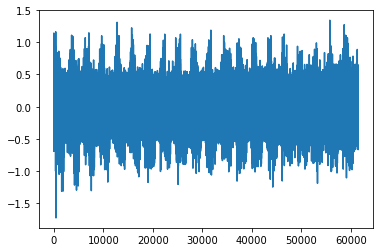

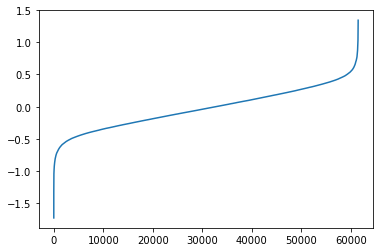

In [17]:
import matplotlib.pyplot as plt
import numpy

w_uncon = param_vals_uncon['FrameLevel.GRU1.Step.Input.W0']
print(w_uncon.shape)

data = w_uncon.flatten()
plt.plot(data)
plt.show()

data = numpy.sort(w_uncon,axis=None)
plt.plot(data)
plt.show()

(20, 3072)


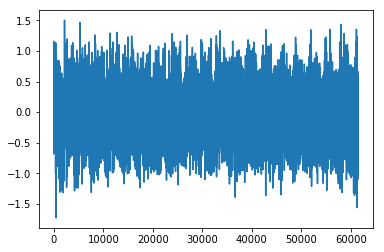

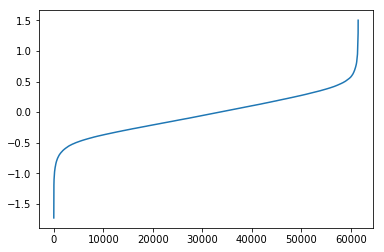

In [19]:
w_uncon = param_vals_init['FrameLevel.GRU1.Step.Input.W0'][:20,:]
print(w_uncon.shape)

data = w_uncon.flatten()
plt.plot(data)
plt.show()

data = numpy.sort(w_uncon,axis=None)
plt.plot(data)
plt.show()

In [95]:
w_uncon = param_vals_uncon['FrameLevel.GRU1.Step.Input.W0']
print(w_uncon.shape)

w_init = param_vals_init['FrameLevel.GRU1.Step.Input.W0'][:20,:]
print(w_init.shape)

(20, 3072)
(20, 3072)


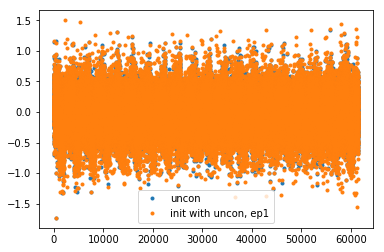

In [97]:
data = w_uncon.flatten()
plt.plot(data,'.',label='uncon')

data = w_init.flatten()
plt.plot(data,'.',label='init with uncon, ep1')

plt.legend()
start = 10000
# plt.xlim([start+0,start+100])
plt.show()

In [50]:
print(numpy.sum(abs(w_uncon-w_init)))
print(numpy.sum(abs(w_uncon)))
print(numpy.sum(abs(w_init)))
w_lab = param_vals_init['FrameLevel.GRU1.Step.Input.W0'][20:,:]
print(w_lab.shape)
print(numpy.sum(abs(w_lab)))

2226.92
15788.3
16753.5
(601, 3072)
16730.9


In [60]:
#3 read init with uncon, later ep

#ep3
path = ('results_2t/models-two_tier-two_tier_con.py-expCON_UNCONINIT-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/params/params_e3_i19201_t8.02_tr1.6794_v1.4084_best.pkl'
       )
with open(path, 'rb') as f:
    param_vals_init = pickle.load(f)
print(len(param_vals_init))

37


In [61]:
checkWeightEvolution(param_vals_uncon,param_vals_init)

delta - weight for wav: 3271.47
15788.3
17316.5
importance - weight for lab: 25025.5


In [62]:
#ep5
path = ('results_2t/models-two_tier-two_tier_con.py-expCON_UNCONINIT-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/params/params_e5_i32001_t13.35_tr1.6616_v1.3692_best.pkl'
       )
with open(path, 'rb') as f:
    param_vals_init = pickle.load(f)
print(len(param_vals_init))

37


In [63]:
checkWeightEvolution(param_vals_uncon,param_vals_init)

delta - weight for wav: 3709.94
15788.3
17668.7
importance - weight for lab: 28301.3


In [98]:
#ep10
path = ('results_2t/models-two_tier-two_tier_con.py-expCON_UNCONINIT-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/params/params_e10_i64001_t26.82_tr1.5493_v1.3138_best.pkl'
       )
with open(path, 'rb') as f:
    param_vals_init = pickle.load(f)
print(len(param_vals_init))

37


In [65]:
checkWeightEvolution(param_vals_uncon,param_vals_init)

delta - weight for wav: 4242.93
15788.3
18133.2
importance - weight for lab: 30437.9


(20, 3072)
(20, 3072)


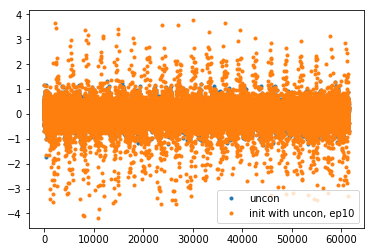

In [101]:
# compare uncon and con(init with uncon)

w_uncon = param_vals_uncon['FrameLevel.GRU1.Step.Input.W0']
print(w_uncon.shape)
w_init = param_vals_init['FrameLevel.GRU1.Step.Input.W0'][:20,:]
print(w_init.shape)

data = w_uncon.flatten()
plt.plot(data,'.',label='uncon')

data = w_init.flatten()
plt.plot(data,'.',label='init with uncon, ep10')

plt.legend()
start = 10000
# plt.xlim([start+0,start+100])
plt.show()

In [102]:
# compare uncon and zerolab

path = ('results_2t/models-two_tier-two_tier_con.py-expZEROLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/params/params_e8_i57583_t12.00_tr1.3151_v1.2346_best.pkl')
with open(path, 'rb') as f:
    param_vals_init = pickle.load(f)
print(len(param_vals_init))

37


In [67]:
checkWeightEvolution(param_vals_uncon,param_vals_init)

delta - weight for wav: 14326.4
15788.3
8819.35
importance - weight for lab: 280395.0


(20, 3072)
(20, 3072)


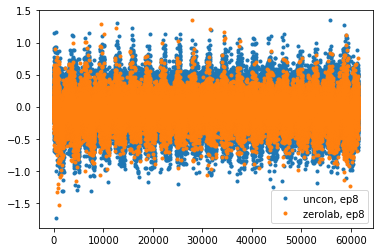

In [103]:
w_uncon = param_vals_uncon['FrameLevel.GRU1.Step.Input.W0']
print(w_uncon.shape)
w_init = param_vals_init['FrameLevel.GRU1.Step.Input.W0'][:20,:]
print(w_init.shape)

data = w_uncon.flatten()
plt.plot(data,'.',label='uncon, ep8')

data = w_init.flatten()
plt.plot(data,'.',label='zerolab, ep8')

plt.legend()
start = 10000
# plt.xlim([start+0,start+100])
plt.show()

check if weights for lab change in ZEROLAB case

In [13]:
#1 read fake uncon
path = ('results_2t/models-two_tier-two_tier_con.py-expZEROLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/params/params_e7_i44801_t3.83_tr1.5044_v1.2416_best.pkl')
with open(path, 'rb') as f:
    param_vals_zl = pickle.load(f)
print(len(param_vals_zl))

37


In [14]:
param_vals_zl_list = []
param_vals_zl_list.append(param_vals_zl)

In [15]:
path = ('results_2t/models-two_tier-two_tier_con.py-expZEROLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/params/params_e8_i57583_t12.00_tr1.3151_v1.2346_best.pkl')
with open(path, 'rb') as f:
    param_vals_zl = pickle.load(f)
param_vals_zl_list.append(param_vals_zl)

path = ('results_2t/models-two_tier-two_tier_con.py-expZEROLAB-n_frames40-frame_size20-emb_size256-skip_connF-dim1024-n_rnn3-rnn_typeGRU-q_levels256-q_typelinear-batch_size20-weight_normT-learn_h0T-which_setSPEECH-lr0.001/params/params_e16_i102401_t37.18_tr1.3265_v1.2583.pkl')
with open(path, 'rb') as f:
    param_vals_zl = pickle.load(f)
param_vals_zl_list.append(param_vals_zl)

(621, 3072)
(621, 3072)
(621, 3072)


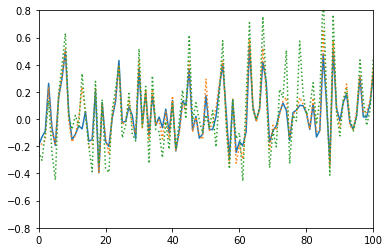

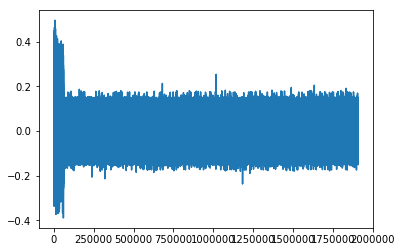

In [25]:
import matplotlib.pyplot as plt
import numpy

w0 = param_vals_zl_list[0]['FrameLevel.GRU1.Step.Input.W0'][:,:]
print(w0.shape)
data = w0.flatten()
plt.plot(data)

w1 = param_vals_zl_list[1]['FrameLevel.GRU1.Step.Input.W0'][:,:]
print(w1.shape)
data = w1.flatten()
plt.plot(data,':')

w2 = param_vals_zl_list[2]['FrameLevel.GRU1.Step.Input.W0'][:,:]
print(w2.shape)
data = w2.flatten()
plt.plot(data,':')

plt.xlim([0,100])
plt.ylim([-0.8,0.8])
plt.show()

#numpy.sum(abs(w0-w1))

data = (w1-w0).flatten()
plt.plot(data)
plt.show()

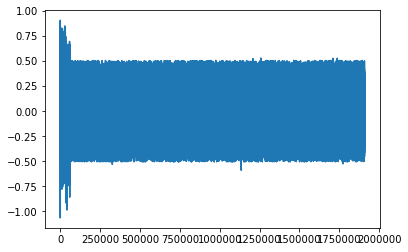

In [27]:
data = (w2-w0).flatten()
plt.plot(data)

#plt.xlim([0,30*3072])
plt.show()

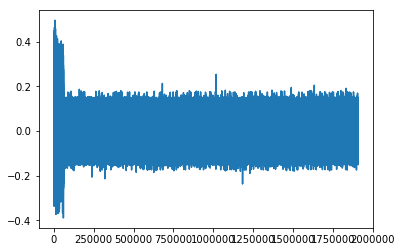

In [28]:
data = (w1-w0).flatten()
plt.plot(data)
plt.show()

# check output at training time

In [1]:
import numpy as np
trainOut = np.load('bkup_data/trainOut.npy')
trainRef = np.load('bkup_data/trainRef.npy')

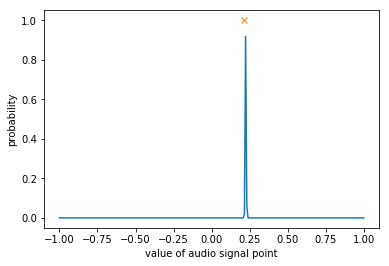

In [7]:
import matplotlib.pyplot as plt
data = trainOut[2]
x = np.array(range(len(data)))/255.0-0.5
x *= 2
plt.plot(x,data)
data = trainRef[2]
data = data/255.0-0.5
data *= 2
plt.plot(data,1,'x')
plt.xlabel('value of audio signal point')
plt.ylabel('probability')
plt.show()

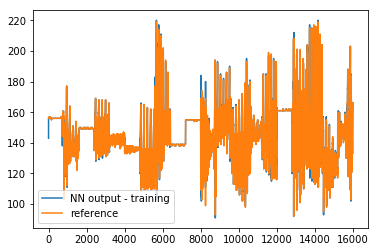

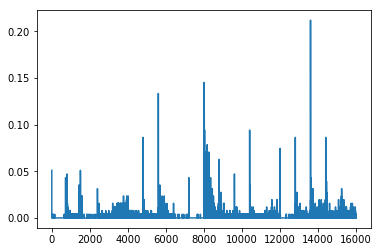

In [78]:
trainSample = np.argmax(trainOut,axis=1)
plt.plot(trainSample,'',label='NN output - training')
plt.plot(trainRef,'',label='reference')
#plt.xlim([500,1500])
plt.legend()
plt.show()

plt.plot(abs(trainRef-trainSample)/255.)
#plt.xlim([500,1500])
plt.legend()
plt.show()

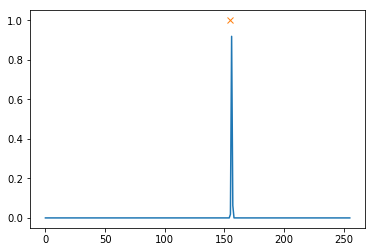

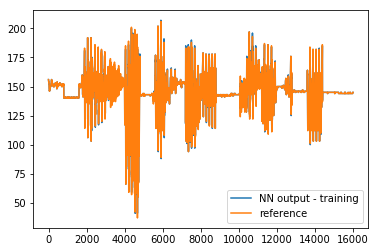

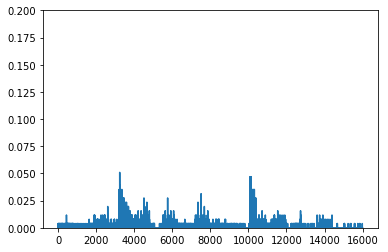

In [80]:
trainOut = np.load('bkup_data/trainOut.npy')
trainRef = np.load('bkup_data/trainRef.npy')

data = trainOut[2]
plt.plot(data)
data = trainRef[2]
plt.plot(data,1,'x')
plt.show()

trainSample = np.argmax(trainOut,axis=1)
plt.plot(trainSample,'',label='NN output - training')
plt.plot(trainRef,'',label='reference')
#plt.xlim([500,1500])
plt.legend()
plt.show()

plt.plot(abs(trainRef-trainSample)/255.)
plt.ylim([0,0.2])
plt.legend()
plt.show()

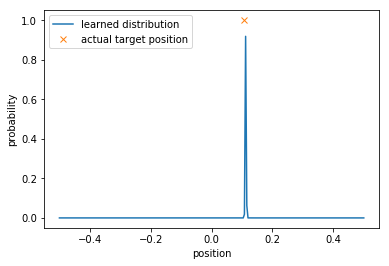

In [1]:
import numpy as np
import matplotlib.pyplot as plt
trainOut = np.load('bkup_data/trainOut.npy')
trainRef = np.load('bkup_data/trainRef.npy')

data = trainOut[2]
x = np.array(range(len(data)))/255.0 -0.5
plt.plot(x,data,label='learned distribution')
data = trainRef[2]/255.0 -0.5
plt.plot(data,1,'x',label='actual target position')
plt.ylabel('probability')
plt.xlabel('position')
plt.legend()
plt.show()

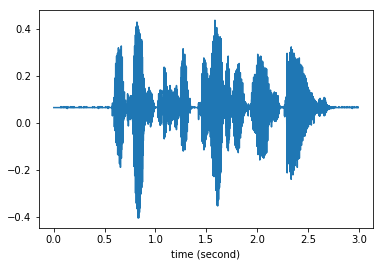

In [20]:
data = seqs[0][100:3*16000]
x = np.array(range(len(data)))/16000.0
plt.plot(x,data/255.0-0.5,label='learned distribution')
plt.xlabel('time (second)')
plt.show()